# Задача распределения грузов по поездам при помощи генетических влгоритмов

In [ ]:
import random as random # Импортируем библиотку генерации случайных значений
import numpy as np # Импортируем библиотеку numpy
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib
import matplotlib.colors as colors # Импортируем модуль colors библиотеки matplotlib

# Статический вывод графики (графики отображаются в той ячейке, в которой используется plt.show())
%matplotlib inline 

In [ ]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    newpopul = [] # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse) # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv): # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i]) # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index]) # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(
        curr_popul,
        nsurv
        ):   
    indexp1 = random.randint(0, nsurv - 1) # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1) # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1] # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2] # Получаем второго бота-родителя по indexp2    
    return botp1, botp2 # Возвращаем обоих полученных ботов

'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''
def crossPointFrom2Parents(
        botp1,
        botp2, 
        j
        ):
    pindex = random.random() # Получаем случайное число в диапазоне от 0 до 1
    
    # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x # Возвращаем значние бота

# Распределение грузов по поездам



1. Решить задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределения грузов по поездам:

А. Поезда: 1, 12, 72, 4, 55, 1

Б. Грузы: 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8

In [ ]:
train = np.array([1,12,72,4,55,1]) # Вместимость каждого поезда
# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов (85=85))

size = np.array([1,1,1,1,4,3,3,3,1,27,31,7,7,11,22,7,7,8]) 


print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

145
145
(6,)
(18,)


0   161.08   [60, 84, 88, 96, 100, 102, 102, 106, 108, 110, 112, 112, 114, 114, 116, 116, 118, 118, 120, 120]
1   125.88   [38, 44, 46, 54, 56, 60, 68, 84, 84, 88, 88, 90, 92, 92, 92, 92, 94, 96, 96, 96]
2   95.9   [22, 22, 38, 38, 42, 42, 44, 46, 46, 48, 48, 52, 54, 54, 56, 60, 60, 60, 62, 62]
3   88.98   [22, 22, 28, 36, 38, 38, 40, 42, 42, 42, 44, 46, 46, 46, 46, 48, 48, 48, 48, 48]
4   76.42   [22, 22, 24, 28, 28, 28, 28, 30, 32, 34, 36, 36, 38, 38, 38, 40, 40, 40, 40, 40]
5   65.22   [20, 22, 22, 22, 24, 24, 26, 28, 28, 28, 28, 30, 32, 32, 32, 32, 34, 34, 36, 36]
6   60.98   [12, 18, 20, 20, 22, 22, 22, 24, 24, 24, 26, 26, 26, 28, 28, 28, 28, 30, 30, 32]
7   62.48   [12, 14, 14, 18, 18, 20, 20, 22, 22, 22, 22, 24, 24, 24, 24, 24, 26, 26, 26, 26]
8   61.42   [12, 14, 14, 18, 18, 18, 20, 20, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24]
9   53.82   [10, 12, 14, 14, 18, 18, 18, 20, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 24]
10   55.78   [6, 8, 10, 12, 14, 14, 16, 18, 18, 18, 1

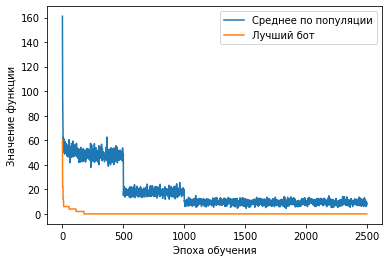

In [ ]:
n = 100 # Общее число ботов
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 2500 # количество эпох
mut = 0.3 # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0] # Количество поездов

popul = [] # Двумерный массив популяции, размерностью [n, l].
val = [] # Одномерный массив значений этих ботов

plotmeanval = [] # сюда будут заносится значения для графика по среднему значению
plotminval = [] # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n): # Проходим по всей длине популяции
    popul.append([]) # Создаем пустого бота
    for j in range(l): # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs): # Проходим по всем эпохам

    if (it == 500): # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if (it == 1000): # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = [] # Создаем пустой список для значений ботов
    for i in range(n): # Проходим по всей популяции
        bot = popul[i] # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0]) # Массив, хранящий заполняемость каждого поезда
        for j in range(l): # Проходим по всей длине бота
            trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-го поезда на size[j]          
        
        f = 0 # Обнуляем ошибку i-го бота 
        for t in range(trains): # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            f += abs(train[t] - trainfill[t]) 
        val.append(f) # Добавляем в val значение ошибки для i-го бота    
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", sum(val) / len(val), " ", sval[0:20])  # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val)) # Добавляем среднее значение в список
    plotminval.append(sval[0]) # Добавляем минимальное значение в список
    
    for i in range(nnew): # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
    
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x) # Добавляем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию    
    popul = newpopul # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
# Выводим 20 лучших ботов
for i in range(20):
    print(popul[i])

[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
[5, 0, 1, 

In [ ]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot) # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32') # Массив заполненности поездов
for j in range(l): # Проходим по всей длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [5, 0, 1, 2, 1, 3, 2, 4, 3, 4, 2, 4, 4, 4, 2, 1, 2, 2]
Вместимость поездов по боту: [ 1 12 72  4 55  1]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


#Таким образом ГА нашел наилучшее решение с нулевой ошибкой

2. Решить задачу расстановки грузов по поездам с дополнительным условием: нужно заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для нужон изменить функцию оценки качества бота:

А. Поезда: 10, 10, 10, 12, 12, 12

Б. Грузы: 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6

In [ ]:
train = np.array([10, 10, 10, 12, 12, 12]) # Вместимость каждого поезда
# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов (85=85))

size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6]) 


print(train.sum())
print(size.sum())

print(train.shape)
print(size.shape)

66
54
(6,)
(18,)


0   1260.12   [828, 912, 924, 936, 936, 960, 972, 972, 1008, 1020, 1032, 1032, 1032, 1044, 1056, 1080, 1092, 1092, 1104, 1104]
1   1155.6   [828, 852, 912, 912, 924, 924, 936, 936, 936, 960, 972, 972, 972, 984, 984, 996, 996, 1008, 1008, 1008]
2   1162.2   [804, 828, 840, 852, 864, 912, 912, 924, 924, 924, 936, 936, 936, 948, 960, 960, 960, 972, 972, 972]
3   1144.08   [780, 804, 828, 840, 840, 852, 864, 864, 864, 900, 912, 912, 924, 924, 924, 924, 936, 936, 936, 948]
4   1152.24   [780, 804, 804, 828, 840, 840, 852, 864, 864, 864, 888, 900, 900, 912, 912, 924, 924, 924, 924, 924]
5   1128.84   [780, 804, 804, 828, 828, 840, 840, 840, 852, 864, 864, 864, 864, 864, 876, 888, 900, 900, 912, 912]
6   1133.76   [780, 804, 804, 828, 828, 828, 840, 840, 840, 852, 852, 864, 864, 864, 864, 864, 864, 876, 888, 900]
7   1121.52   [780, 804, 804, 828, 828, 828, 840, 840, 840, 852, 852, 864, 864, 864, 864, 864, 864, 876, 876, 888]
8   1130.28   [780, 804, 804, 804, 828, 828, 828, 840, 840, 840, 84

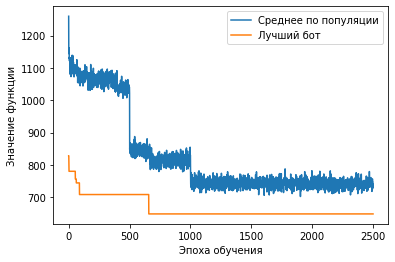

In [ ]:
n = 100 # Общее число ботов
nsurv = 20 # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 2500 # количество эпох
mut = 0.4 # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0] # Количество поездов

popul = [] # Двумерный массив популяции, размерностью [n, l].
val = [] # Одномерный массив значений этих ботов

plotmeanval = [] # сюда будут заносится значения для графика по среднему значению
plotminval = [] # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n): # Проходим по всей длине популяции
    popul.append([]) # Создаем пустого бота
    for j in range(l): # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs): # Проходим по всем эпохам

    if (it == 500): # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if (it == 1000): # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = [] # Создаем пустой список для значений ботов
    for i in range(n): # Проходим по всей популяции
        bot = popul[i] # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0]) # Массив, хранящий заполняемость каждого поезда
        for j in range(l): # Проходим по всей длине бота
            trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-го поезда на size[j]          
        
        f = 0 # Обнуляем ошибку i-го бота 
        for t in range(trains): # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            dl =trainfill.shape[0]
            for k in range(dl-1):
                for K in range(k+1,dl):
                  f += abs(trainfill[k] - trainfill[K])  #попарное сравнение
        val.append(f) # Добавляем в val значение ошибки для i-го бота    
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) # Получаем новую популяцию и сортированный список значнией
    print(it, " ", sum(val) / len(val), " ", sval[0:20])  # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val)) # Добавляем среднее значение в список
    plotminval.append(sval[0]) # Добавляем минимальное значение в список
    
    for i in range(nnew): # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv) # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = [] # Массив для нового бота
    
        for j in range(l): # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j) # Получаем значение для j-ого компонента бота
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x) # Добавляем новое значение в бота      
        newpopul.append(newbot) # Добавляем бота в новую популяцию    
    popul = newpopul # Записываем в popul новую посчитанную популяцию

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
bot = popul[0] # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot) # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32') # Массив заполненности поездов
for j in range(l): # Проходим по всей длине бота
    trainfill[bot[j]] += size[j] # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train) # Выводим реальную вместимость поездов

Значения лучшего бота: [3, 5, 0, 2, 1, 1, 3, 2, 0, 2, 2, 4, 5, 5, 0, 1, 3, 4]
Вместимость поездов по боту: [9 9 9 9 9 9]
Реальная вместимость поездов: [10 10 10 12 12 12]


#Довольно просто. Сравниваем попарно элементы полученного вектора заполянемости вагонов, стремимся к тмоу чтобы ошибка была минимальная. 